# Scatterplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

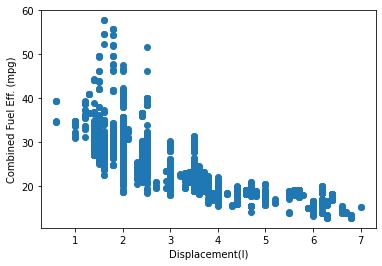

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');  # comb for combined fuel efficiency
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

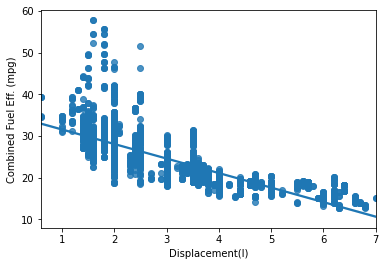

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');  # scatter + line
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# Regplot

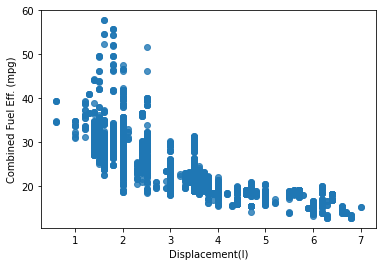

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);  # scatter + line
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

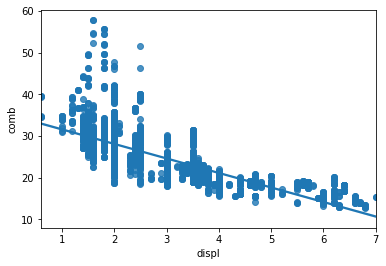

In [6]:
sb.regplot(x= fuel_econ['displ'], y= fuel_econ['comb']);

## Log scale

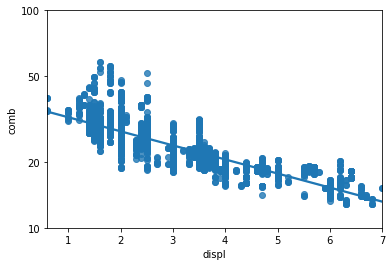

In [7]:
def log_trans(x, inverse = False):  # c.f) 음수 설정없는 것으로 지정!!
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)  # 음수는 -10의 제곱으로 변경

sb.regplot(x= fuel_econ['displ'], y= fuel_econ['comb'].apply(log_trans));   # y 를 로그값으로 변환 출력. log(18)
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);    # tick 값도 로그값으로 변환하여 붙여준다.

In [8]:
#[지수] An array with elements of arr1 raised to exponents in arr2

arr1 = [2, 2, 2, 2, 2]
arr2 = [2, 3, 4, 5, 6]
print ("arr1         : ", arr1)
print ("arr1         : ", arr2)
  
# output_array
out = np.power(arr1, arr2)
print ("\nOutput array : ", out)

arr1         :  [2, 2, 2, 2, 2]
arr1         :  [2, 3, 4, 5, 6]

Output array :  [ 4  8 16 32 64]


## Overplotting, Transparency, and Jitter

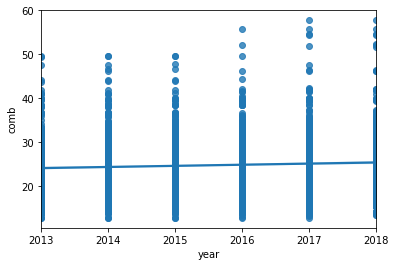

In [9]:
sb.regplot(x= fuel_econ['year'], y= fuel_econ['comb']);

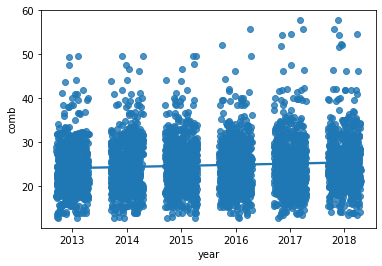

In [10]:
sb.regplot(x= fuel_econ['year'], y= fuel_econ['comb'], x_jitter = 0.3);   # jitter - random dot surrounding the value

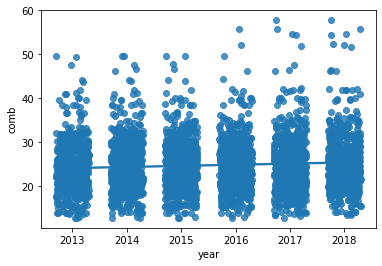

In [11]:
sb.regplot(x= fuel_econ['year'], y= fuel_econ['comb'], x_jitter = 0.3);   # jitter - random dot surrounding the value

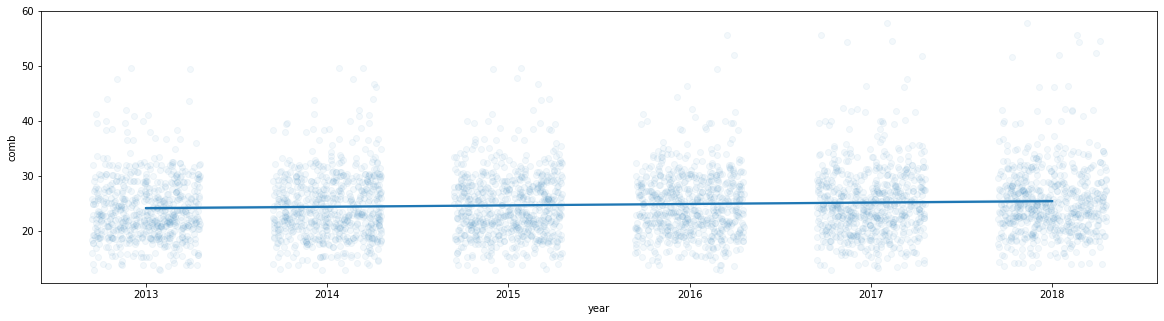

In [12]:
plt.figure(figsize = [20, 5])

sb.regplot(x= fuel_econ['year'], y= fuel_econ['comb'], x_jitter = 0.3,
          scatter_kws = {'alpha' : 1/20});   # Transparency

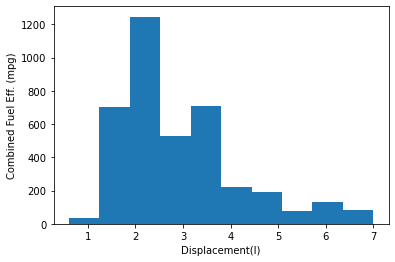

In [13]:
plt.hist(fuel_econ['displ']); 
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# Heatmap

## hist2d

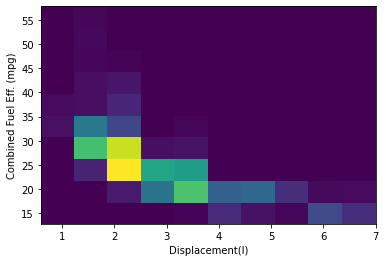

In [14]:
plt.hist2d(x= fuel_econ['displ'], y= fuel_econ['comb']); 
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

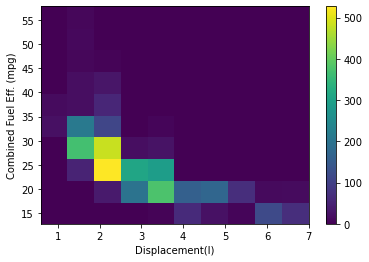

In [15]:
plt.hist2d(x= fuel_econ['displ'], y= fuel_econ['comb']); 
plt.colorbar()   # add colorbar
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

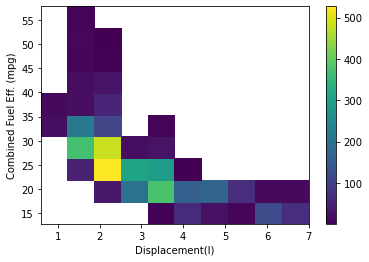

In [16]:
plt.hist2d(x= fuel_econ['displ'], y= fuel_econ['comb'], cmin = 0.5);  # null 값은 백색표기
plt.colorbar()
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

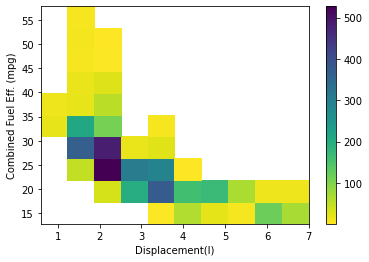

In [17]:
plt.hist2d(x= fuel_econ['displ'], y= fuel_econ['comb'], cmin = 0.5,
          cmap = 'viridis_r');  # 색상반전
plt.colorbar()
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

In [18]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


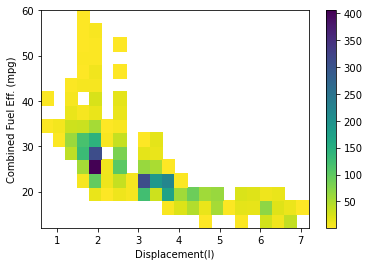

In [19]:
bins_x = np.arange(0.6, 7.0 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

plt.hist2d(x = fuel_econ['displ'], y= fuel_econ['comb'], cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);  # 색상반전

plt.colorbar()
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

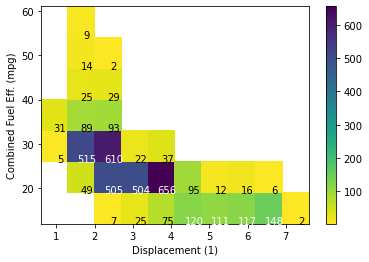

In [20]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

# Violinplot

In [21]:
fuel_econ.VClass.sort_values().value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [22]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# 이 Catogory 순서대로 전체 자료를 정렬. API - CategoricalDtype 사용

In [23]:
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
vclasses

CategoricalDtype(categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars',
                  'Midsize Cars', 'Large Cars'],
                 ordered=True)

In [24]:
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);   # 정렬 실행

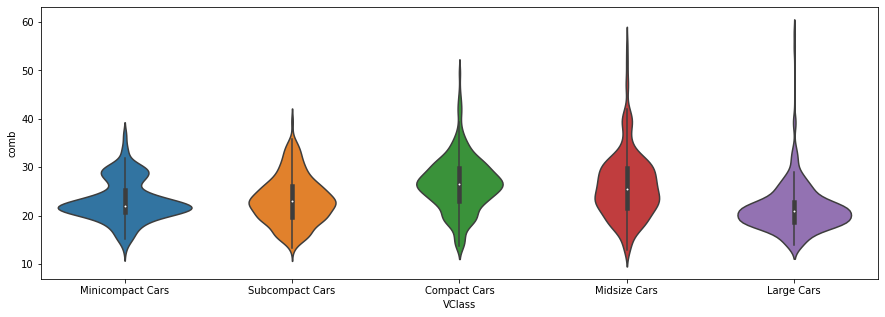

In [25]:
plt.figure(figsize = [15,5])
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb');

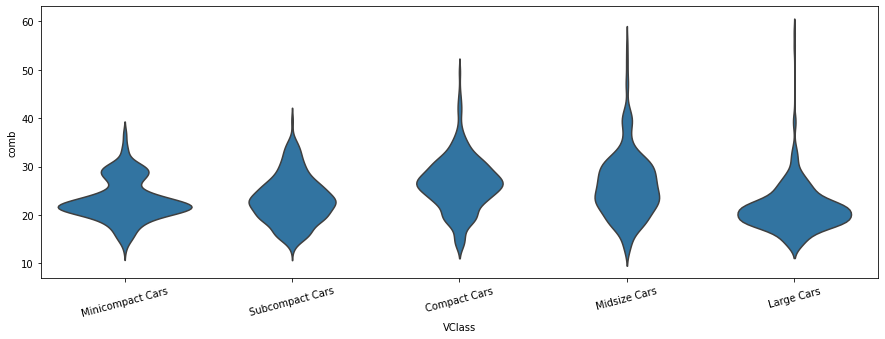

In [26]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color, inner = None);

# color 단색변경
# inner 가운데 boxplot 삭제

plt.xticks(rotation = 15);

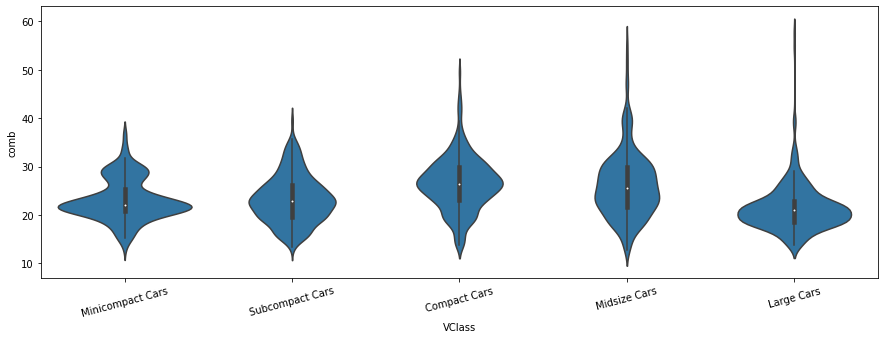

In [27]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 15);

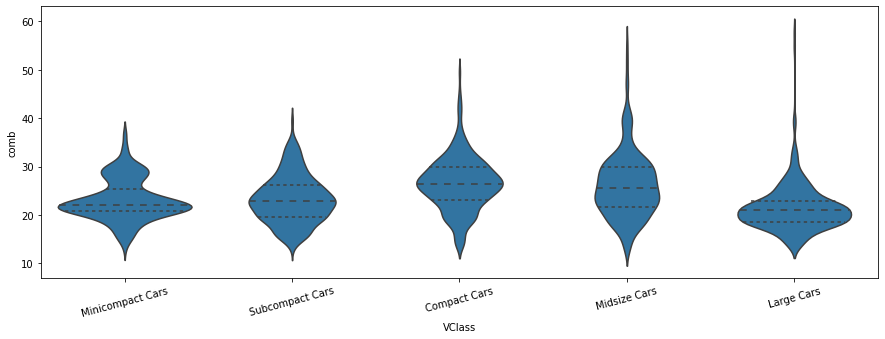

In [28]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color, inner = 'quartile');   # 가운데 Boxplot을 Quartile 로 대체

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 15);

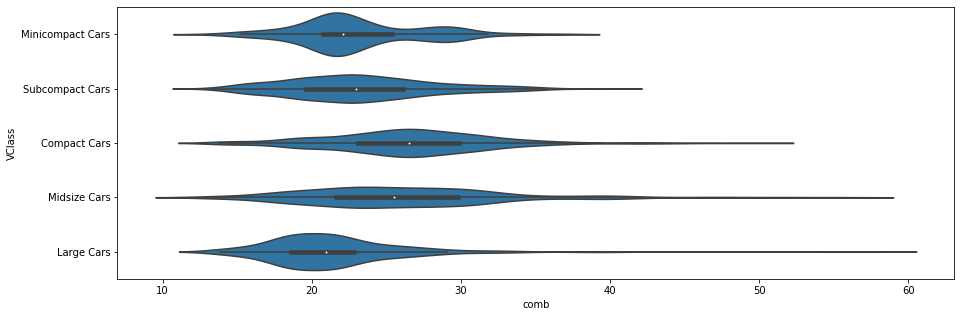

In [29]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, y = 'VClass', x = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

# Boxplot

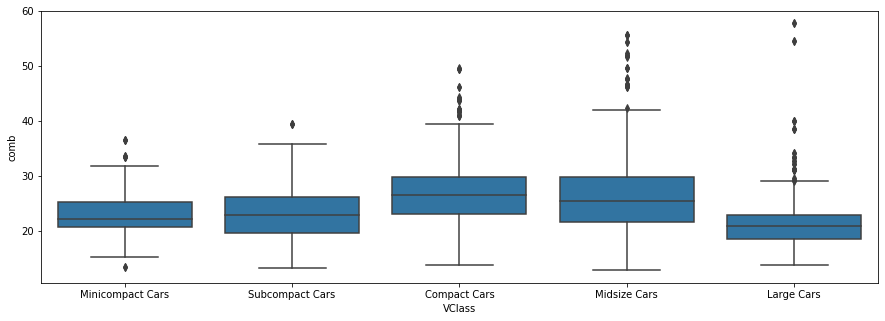

In [30]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

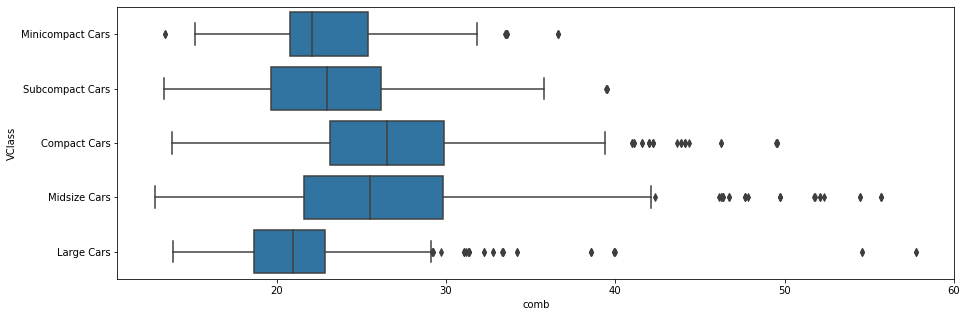

In [31]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, y = 'VClass', x = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

In [32]:
fuel_econ.query('VClass == "Minicompact Cars"').comb.describe()

count    321.000000
mean      23.152877
std        4.240233
min       13.384900
25%       20.755000
50%       22.100000
75%       25.358800
max       36.612200
Name: comb, dtype: float64

## subplot

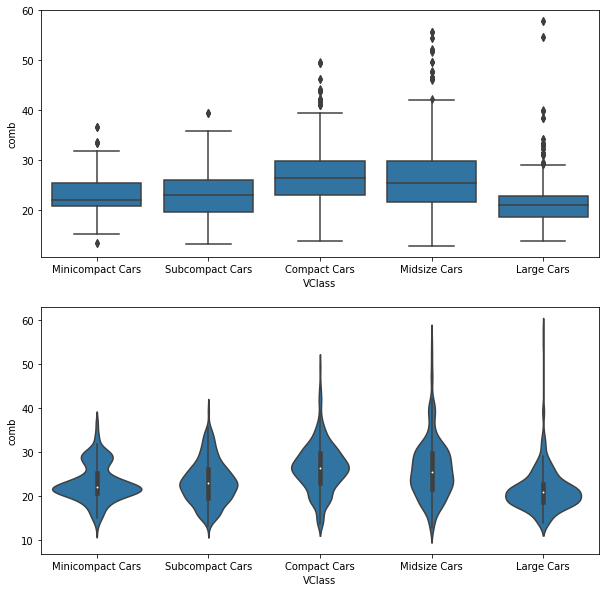

In [33]:
plt.figure(figsize = [10,10])

plt.subplot(2,1,1)
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

plt.subplot(2,1,2)
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

# Clustered Bar Charts

In [34]:
fuel_econ['trans']

0                        Automatic (AM6)
1                      Automatic (AM-S6)
2                         Automatic (S6)
3                         Automatic (S6)
4                         Automatic (S6)
                      ...               
3924    Automatic (variable gear ratios)
3925                     Automatic (AM6)
3926                     Automatic (AM6)
3927                     Automatic (S10)
3928                     Automatic (S10)
Name: trans, Length: 3929, dtype: object

In [35]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ['trans_type']

0       Automatic
1       Automatic
2       Automatic
3       Automatic
4       Automatic
          ...    
3924    Automatic
3925    Automatic
3926    Automatic
3927    Automatic
3928    Automatic
Name: trans_type, Length: 3929, dtype: object

In [116]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()   # id.count() 기능과 동일
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [37]:
ct_counts = ct_counts.reset_index(name = 'count')    # Sorting table을 바로 DataFrame 형태로 변환
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [38]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


## Heatmap

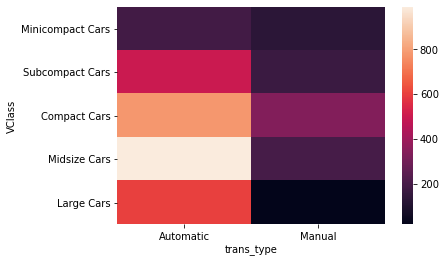

In [39]:
sb.heatmap(ct_counts);

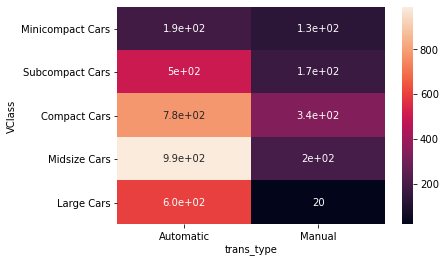

In [40]:
sb.heatmap(ct_counts, annot = True);

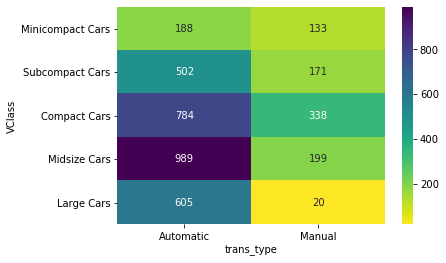

In [41]:
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'viridis_r');   # Added each value on each cell to be more specific

# You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

## Countplot

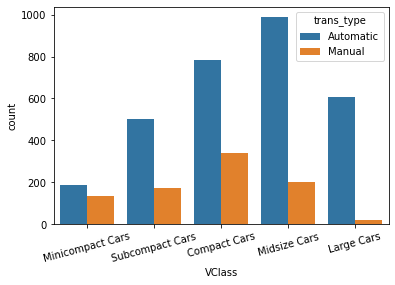

In [42]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

# FacetGrid

In [43]:
fuel_econ.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

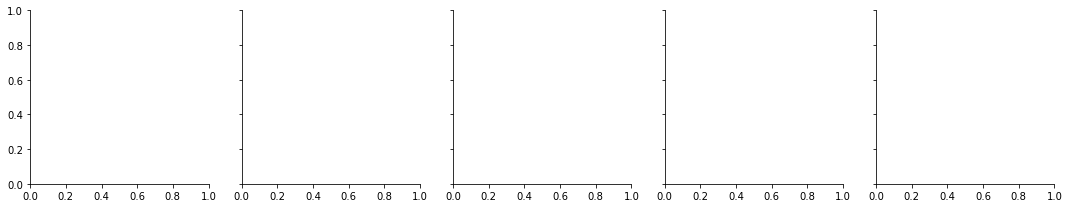

In [44]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')   # make chart frame

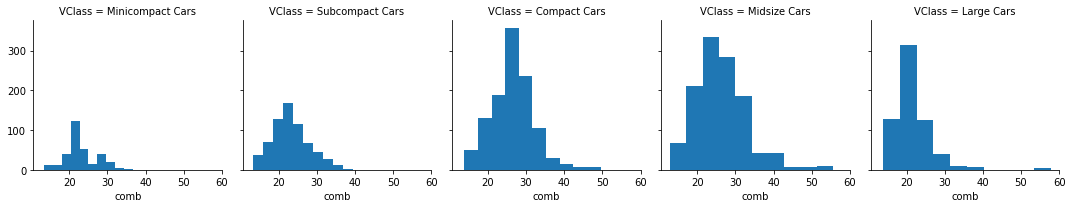

In [45]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')   # make chart frame
g.map(plt.hist, 'comb');   # c.f) do not put 'x = '

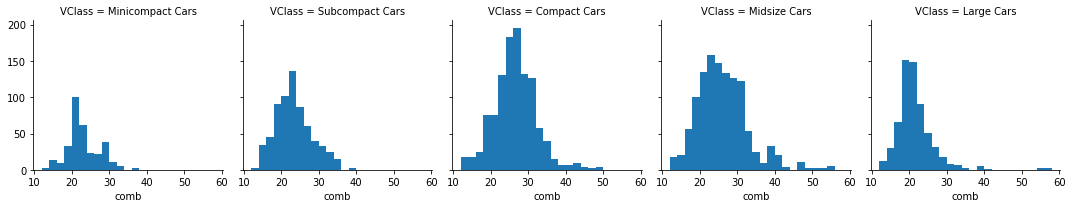

In [46]:
bins = np.arange(12, 58+2, 2)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass')   # make chart frame
g.map(plt.hist, 'comb', bins = bins);   # c.f) do not put 'x = '

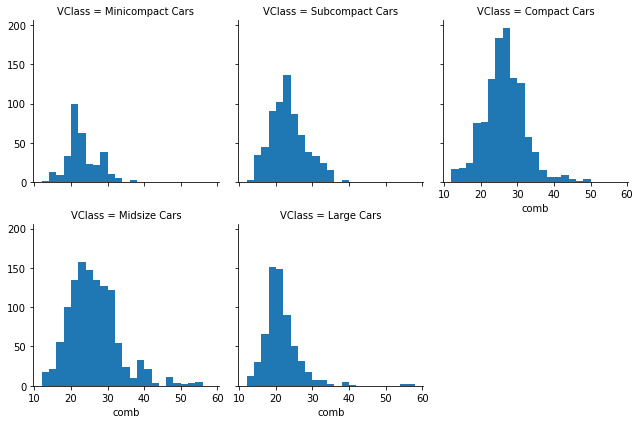

In [47]:
bins = np.arange(12, 58+2, 2)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap= 3)   # wrap the 4th 5th chart under
g.map(plt.hist, 'comb', bins = bins);   # c.f) do not put 'x = '

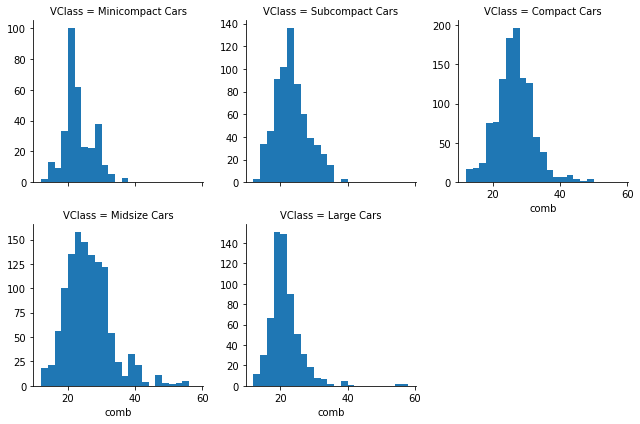

In [48]:
bins = np.arange(12, 58+2, 2)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap= 3, sharey = False)   # Y axis limit
g.map(plt.hist, 'comb', bins = bins);   # c.f) do not put 'x = '

In [49]:
fuel_econ[['trans', 'comb']]

,trans,comb
0,Automatic (AM6),18.7389
1,Automatic (AM-S6),25.2227
2,Automatic (S6),20.6716
3,Automatic (S6),19.8774
4,Automatic (S6),28.6813
...,...,...
3924,Automatic (variable gear ratios),54.4329
3925,Automatic (AM6),41.0000
3926,Automatic (AM6),42.0000
3927,Automatic (S10),23.0021


In [50]:
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [51]:
group_means = group_means.sort_values(['comb'], ascending = False)
group_means

,comb
trans,
Automatic (variable gear ratios),37.523607
Automatic (A1),34.677929
Automatic (AM6),33.194893
Automatic (AV-S6),31.246947
Automatic (AV-S7),30.242895
Manual 5-spd,29.584096
Automatic 4-spd,29.283284
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867


In [52]:
group_means.sort_values(['comb'], ascending = False).index

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

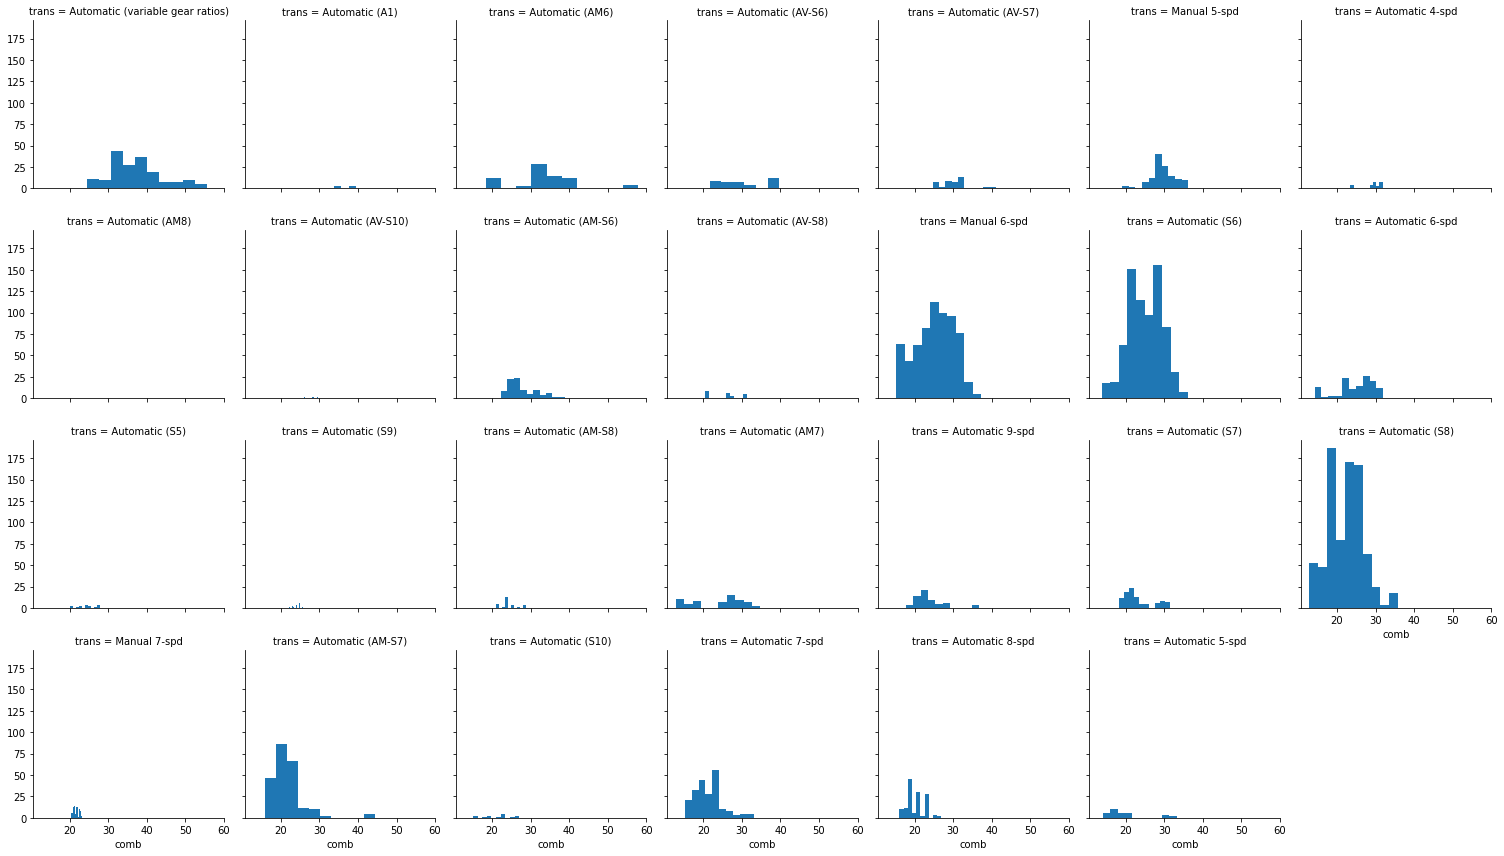

In [53]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

# Adaptation of Univariate Plots

## Barplot

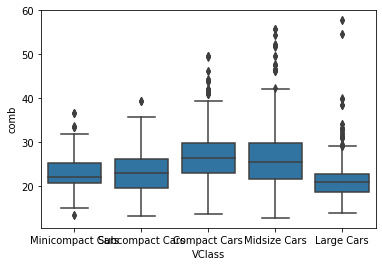

In [54]:
# plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경
# inner 가운데 Boxplot 삭제

plt.xticks(rotation = 0);

In [55]:
fuel_econ[['VClass', 'comb']].groupby('VClass').mean()

,comb
VClass,
Minicompact Cars,23.152877
Subcompact Cars,23.303826
Compact Cars,26.504232
Midsize Cars,26.180177
Large Cars,21.519717


> Barplot indicated as a **mean** value for the second variable(y)

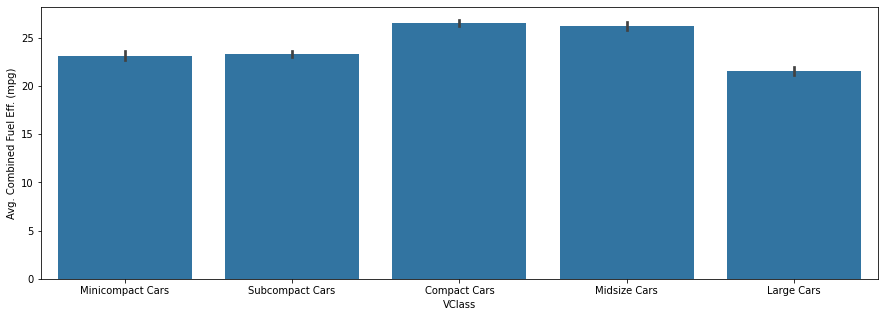

In [56]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color);

# color 단색변경

plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

- Changed the third line as 'barplot' from boxplot
- Added Y axis label


> Whisker 가 짧을수록 Confidence level 은 높아진다. 
Data가 많을 수록 Conficence level은 높아진다. 

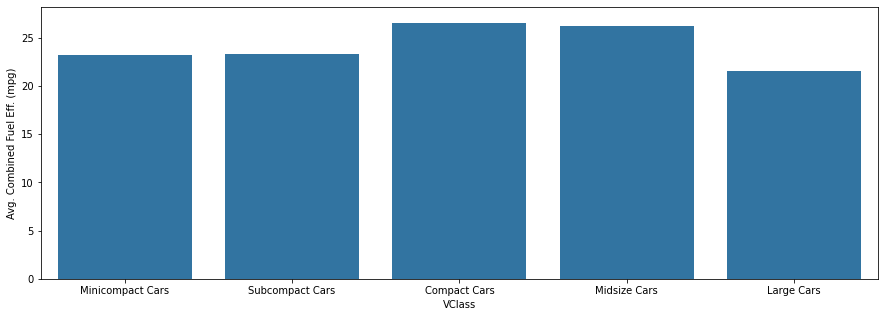

In [57]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color, errwidth = 0);

# color changed as mono tone.
# errwidth = 0  Leave Whisker out of the plot

plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

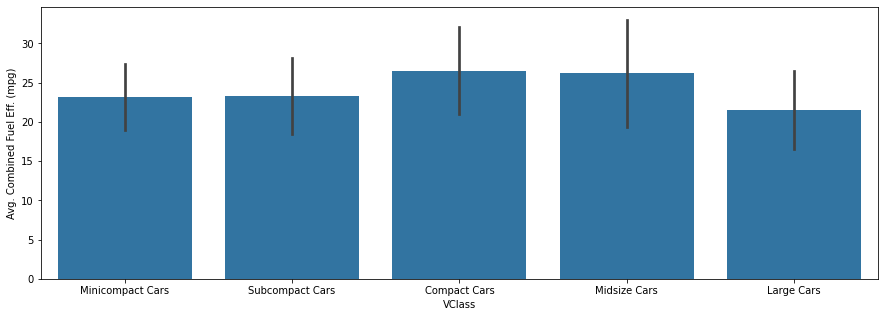

In [58]:
plt.figure(figsize = [15,5])

base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             color = base_color, ci = 'sd');

# color changed as mono tone.
# ci = 'sd' : Bar shows a standard deviation instead

plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

## Pointplot

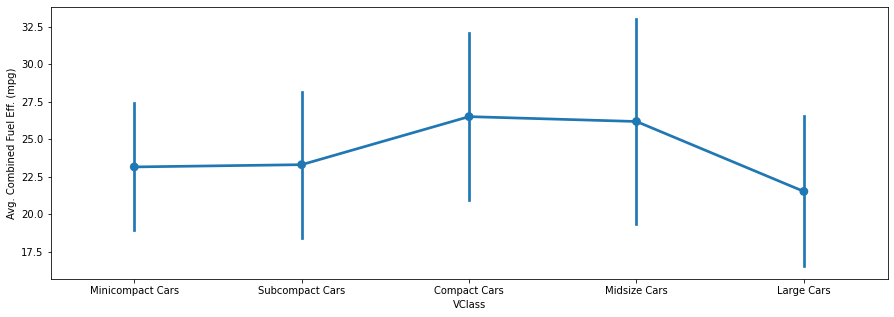

In [59]:
plt.figure(figsize = [15,5])

sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             ci = 'sd');

# ci = 'sd' : Bar shows a standard deviation instead

plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

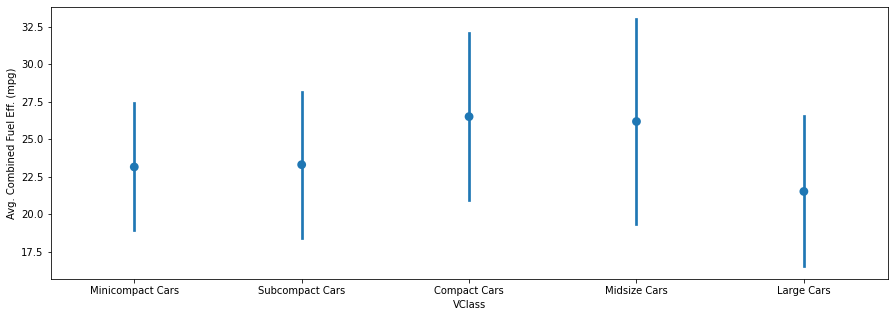

In [60]:
plt.figure(figsize = [15,5])

sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
             ci = 'sd', linestyles = "");

# linestyles = "" : Turn off the line
# ci = 'sd' : Bar shows a standard deviation instead

plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

## violinplot, boxplot, barplot

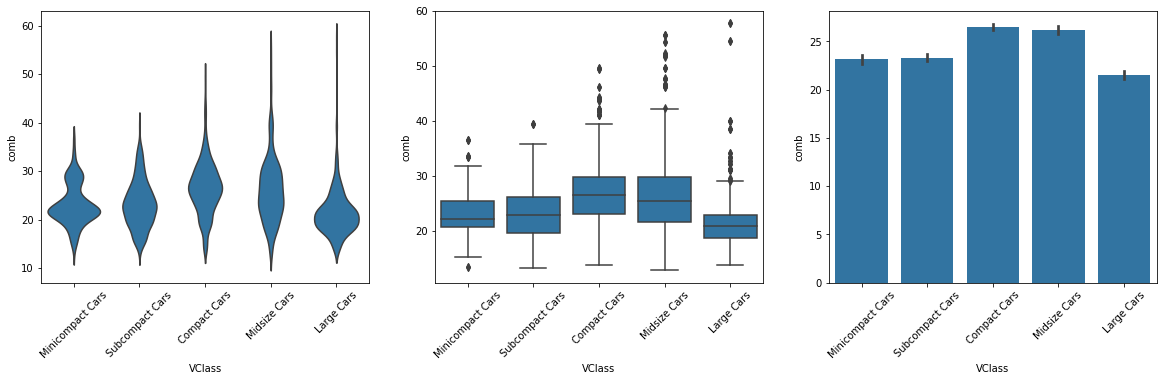

In [61]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# Lineplot

The **line plot** is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a **summary statistic (like mean or median)** of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

## errorbar

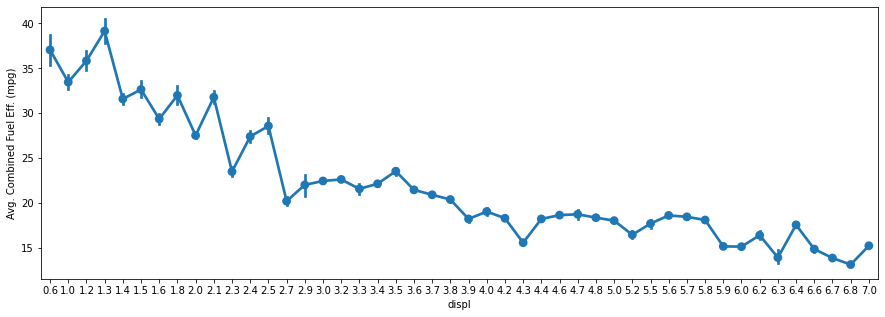

In [82]:
plt.figure(figsize = [15,5])

sb.pointplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xticks(rotation = 0);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

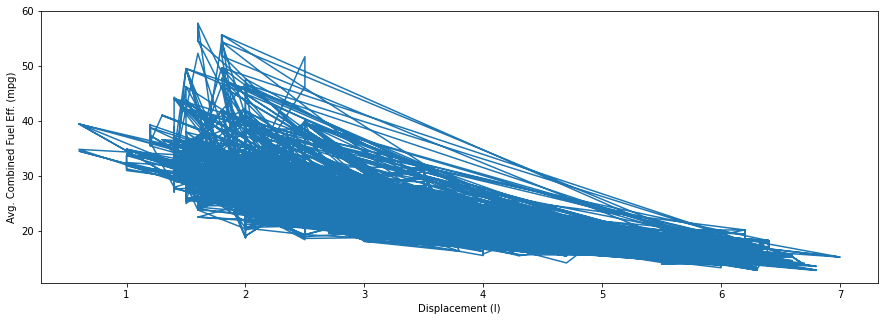

In [62]:
plt.figure(figsize = [15,5])

plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)');
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [63]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_e

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ])

In [64]:
bins_c = bins_e[:-1] + 0.1   # leaving out the last value of the bin edge since that won't correspond  to an actual bin center
bins_c 

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [76]:
fuel_econ['displ'].head()

0    3.8
1    2.0
2    3.6
3    3.6
4    2.4
Name: displ, dtype: float64

In [65]:
# to figure out which bin each data points should be used in
# pd.cut(series to slice, bins, value that are equal to the mean by 'include_lowest')

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [67]:
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_mean

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

In [73]:
comb_std = fuel_econ['comb'].groupby(displ_binned).std()
comb_std

displ
(0.599, 0.8]    2.648632
(0.8, 1.0]      1.448621
(1.0, 1.2]      2.401971
(1.2, 1.4]      3.465692
(1.4, 1.6]      5.059187
(1.6, 1.8]      6.636071
(1.8, 2.0]      4.171142
(2.0, 2.2]      0.940396
(2.2, 2.4]      3.600048
(2.4, 2.6]      5.846508
(2.6, 2.8]      0.634145
(2.8, 3.0]      2.169551
(3.0, 3.2]      0.274570
(3.2, 3.4]      0.940969
(3.4, 3.6]      2.535865
(3.6, 3.8]      1.207384
(3.8, 4.0]      1.543878
(4.0, 4.2]      0.123840
(4.2, 4.4]      1.327419
(4.4, 4.6]      0.444323
(4.6, 4.8]      1.731659
(4.8, 5.0]      0.924086
(5.0, 5.2]      0.479634
(5.2, 5.4]           NaN
(5.4, 5.6]      1.176742
(5.6, 5.8]      0.564345
(5.8, 6.0]      0.809626
(6.0, 6.2]      1.639440
(6.2, 6.4]      1.958629
(6.4, 6.6]      0.626233
(6.6, 6.8]      0.366563
(6.8, 7.0]      0.000000
Name: comb, dtype: float64

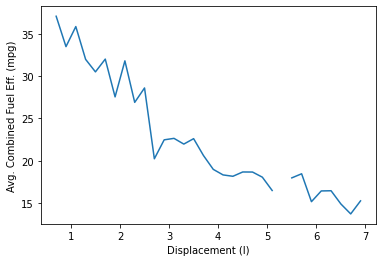

In [72]:
plt.errorbar(x = bins_c, y = comb_mean);
plt.xlabel('Displacement (l)');
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

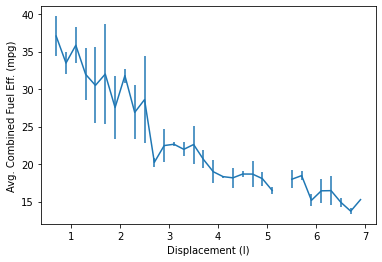

In [75]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);   # added yerr to show the standard deviation
plt.xlabel('Displacement (l)');
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');